In [1]:
import pandas as pd
import gene_transcript_go_api as gtga
import seaborn as sns

In [2]:
start = gtga.parse_input('../data/human_input.start_expressed.tsv')
start_net = gtga.parse_input('../data/human_input.start_expressed.no_empty_transcript.tsv')

In [3]:
end = gtga.parse_input('../data/human_input.end_expressed.tsv')
end_net = gtga.parse_input('../data/human_input.end_expressed.no_empty_transcript.tsv')

In [4]:
print(start.number_of_isoforms() / start.number_of_genes(), start.number_of_isoforms(), start.number_of_genes())
print(start_net.number_of_isoforms() / start_net.number_of_genes(), start_net.number_of_isoforms(), start_net.number_of_genes())
print(end.number_of_isoforms() / end.number_of_genes(), end.number_of_isoforms(), end.number_of_genes())
print(end_net.number_of_isoforms() / end_net.number_of_genes(),end_net.number_of_isoforms(), end_net.number_of_genes())


1.7299332534656855 10108 5843
1.5926148906281357 7936 4983
1.7376511226252158 10061 5790
1.5997571833265885 7906 4942


In [5]:
start_net_div = pd.read_csv('../res/human.start_expressed.no_empty_transcript.intragene_isoform_diversity.data.tsv', sep='\t')
end_net_div = pd.read_csv('../res/human.end_expressed.no_empty_transcript.intragene_isoform_diversity.data.tsv', sep='\t')
net_div = pd.read_csv('../res/human.no_empty_transcript.intragene_isoform_diversity.data.tsv', sep='\t')

In [6]:
start_net_div = start_net_div[start_net_div['Type']=='Observed']
end_net_div = end_net_div[end_net_div['Type']=='Observed']
net_div = net_div[net_div['Type']=='Observed']

# diff start and annot

3559


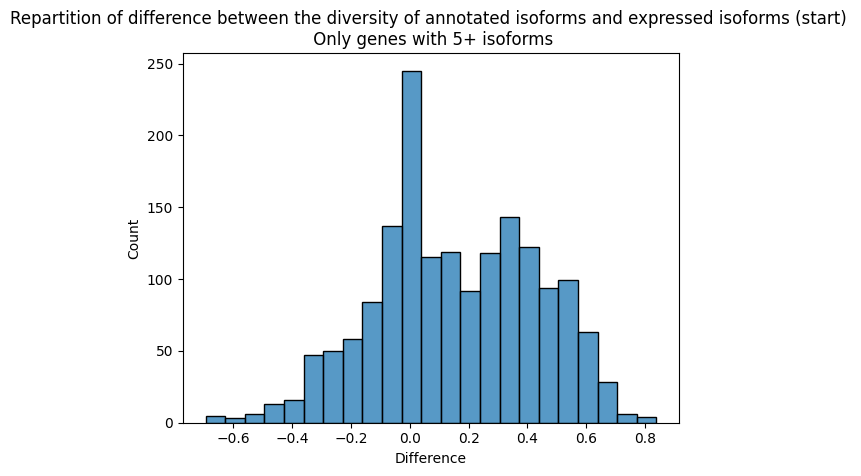

In [17]:
cur = start_net_div.merge(net_div, on='Gene', how='left')
cur['diff'] = cur['Jaccard Index_x'] - cur['Jaccard Index_y']
g = sns.histplot(cur[cur['Number of isoform_y']>4]['diff'])
g.set_title('Repartition of difference between the diversity of annotated isoforms and expressed isoforms (start) \n Only genes with 5+ isoforms')
g.set_xlabel('Difference')
g.set_ylabel('Count')
print(len(cur[cur['Number of isoform_y']>2]))

In [8]:
cur[cur['diff']>0.9]

,Gene,Type_x,Number of isoform_x,Jaccard Index_x,Dice coefficient_x,Overlap coefficient_x,Redundance metric_x,Stdev number GO term_x,BP similarity_x,CC similarity_x,...,Number of isoform_y,Jaccard Index_y,Dice coefficient_y,Overlap coefficient_y,Redundance metric_y,Stdev number GO term_y,BP similarity_y,CC similarity_y,MF similarity_y,diff
213,ENSG00000127481,Observed,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,3,0.066038,0.113679,0.666667,0.099057,45.550948,0.194667,0.000000,0.424333,0.933962
260,ENSG00000121774,Observed,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,2,0.027933,0.054348,1.000000,0.027933,87.000000,0.000000,0.000000,0.678000,0.972067
525,ENSG00000158773,Observed,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,2,0.018634,0.036585,1.000000,0.018634,79.000000,0.000000,0.000000,0.584000,0.981366
556,ENSG00000235750,Observed,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
639,ENSG00000135801,Observed,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,2,0.087500,0.160920,1.000000,0.087500,36.500000,0.000000,0.612000,0.000000,0.912500
697,ENSG00000138080,Observed,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,2,0.009950,0.019704,1.000000,0.009950,99.500000,0.000000,0.575000,0.000000,0.990050
1144,ENSG00000114391,Observed,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,2,0.061404,0.115702,1.000000,0.061404,53.500000,0.000000,0.802000,0.000000,0.938596
1158,ENSG00000163608,Observed,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,2,0.052632,0.100000,1.000000,0.052632,18.000000,0.000000,0.631000,0.000000,0.947368
1161,ENSG00000176542,Observed,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,2,0.045455,0.086957,1.000000,0.045455,31.500000,0.000000,0.000000,0.551000,0.954545
1187,ENSG00000004399,Observed,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,2,0.077720,0.144231,1.000000,0.077720,89.000000,0.459000,0.000000,0.385000,0.922280


diff end and annot

4663


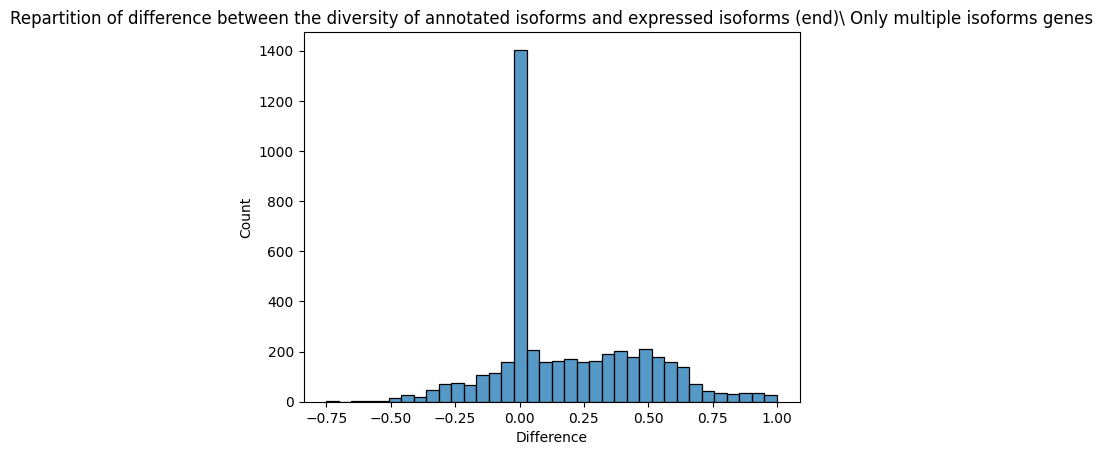

In [21]:
cur = end_net_div.merge(net_div, on='Gene', how='left')
cur['diff'] = cur['Jaccard Index_x'] - cur['Jaccard Index_y']
g = sns.histplot(cur[cur['Number of isoform_y']>1]['diff'])
g.set_title('Repartition of difference between the diversity of annotated isoforms and expressed isoforms (end)\ Only multiple isoforms genes')
g.set_xlabel('Difference')
g.set_ylabel('Count')
print(len(cur[cur['Number of isoform_y']>1]))

## start and end

1814

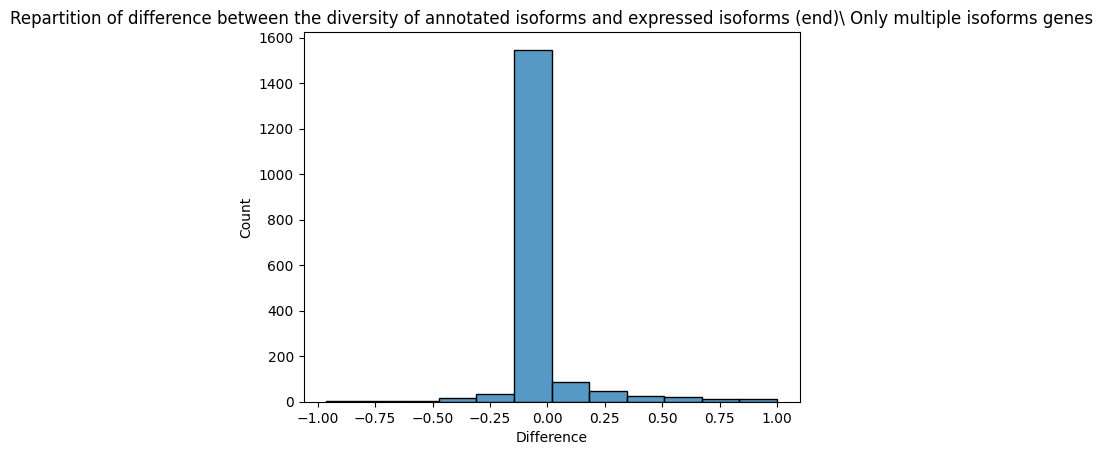

In [20]:
cur = start_net_div.merge(end_net_div, on='Gene', how='left')
cur['diff'] = cur['Jaccard Index_x'] - cur['Jaccard Index_y']
g = sns.histplot(cur[cur['Number of isoform_y']>1]['diff'])
g.set_title('Repartition of difference between the diversity of annotated isoforms and expressed isoforms (end)\ Only multiple isoforms genes')
g.set_xlabel('Difference')
g.set_ylabel('Count')
len(cur[cur['Number of isoform_y']>1]['diff'])